In [52]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
tweet_tokenizer = TweetTokenizer()
import re
import emoji
import string

In [53]:
#Read csv into a dataframe, focus on tweets
df = pd.read_csv("Tweets.csv", header=None, usecols=[1])
na = np.array(df)

In [92]:
#Function to remove stopwords 
# 1. TweetTokenize the individual words
# 2. convert to lowercase to match stopwords
# 3. append non stopwords
stop_words = stopwords.words('english')
def removeStopWords(words):
    new_words = []
    for x in words:
        z = word_tokenize(x)
        for q in z:
            if q.lower() not in stop_words:
                new_words.append(q.lower())
    return new_words

In [55]:
#Remove stopwords
nb = []
for x in na:
    nb.append(removeStopWords(x))    
# print(nb)

[['@', 'comedycentralke', 'words', 'kill', 'luhya', "'wacha", 'ugali', 'ipoe', "'"], ['little', 'luhya', 'remains', 'always', 'sitokingi', 'kills'], ['@', 'cheernatwildcat', 'kill', 'battle', 'weekend', 'wildcat', '!', '!', '#', 'luhya'], ['@', 'homeboyzradio', 'h.b.r', 'luv', 'dat', 'luhya', 'hit', 'luhyas', 'always', 'kill', 'awoooh'], ['#', 'hangoutfriday', 'hahaha', 'ball', 'ya', 'terby', '(', 'derby', ')', 'luhyas', 'kill'], ['luos', '’', 'kill', '...', 'blood', 'thirsty', 'killers', 'two', 'tribes'], ['police', 'kill', 'luos', 'bondo', 'shot', 'grannies', 'migori', '?'], ["'s", 'provision', 'police', 'kill', 'innocent', 'unarmed', 'luos', '.'], ['gvnt', 'us', 'determined', 'kill', 'luos', 'young', 'old', '.', 'issfine'], ['today', 'events', ':', 'scok', '&', 'maraga', 'adventist', 'uphold', 'uhuru', "'s"], ['@', 'citizentvkenya', 'luos', 'kill', 'diana', 'akoth', 'lol', '#', 'slimpossible7'], ['moses', 'kurias', 'main', 'aim', 'kill', 'luos', 'pic.twitter.com/ssky2zejdb'], ['give

In [56]:
#Function to remove punctuations
def remove_punctuations(words):
    fc = []
    for x in words:
        fc.append(x.translate(str.maketrans('', '', string.punctuation)))
    return fc

In [57]:
#Remove punctuations
nc = []
for x in nb:
    nc.append(remove_punctuations(x))
# print(nc)

In [58]:
#Function to Remove single characters and empty array values
def remove_single_characters_and_empty_values(words):
    cv = []
    for x in words:
        if len(x) >1:
            cv.append(x)
    return cv

In [59]:
#Remove single characters and empty array values
nd = []
for x in nc:
    nd.append(remove_single_characters_and_empty_values(x))
# print(nd)

In [60]:
# function to check for ascii characters
def is_ascii(s):
    return all(ord(c) < 128 for c in s)


In [61]:
#Function for Replacing non-ASCII characters with spaces
def replace_non_ascii_with_space(words):
    f = []
    for x in words:
        c = ""
        for y in x:
            c = c + (y if is_ascii(y) else " ")
        f.append(c)
    return f


In [62]:
#Replace non ascii characters with space
ne = []
for x in nd:
    ne.append(replace_non_ascii_with_space(x))
    
# print(ne)
    

In [63]:
#Function to remove html tags
def remove_html_tags(words):
    f = []
    for x in words:
        f.append(re.compile(r'<[^>]+>').sub('', x))
    return f



In [64]:
#Remove all html tags
nf = []
for x in ne:
    nf.append(remove_html_tags(x))
# print(nf)

In [65]:
#Function to remove emojis
def remove_emoticons(words):
    xc = []
    for x in words:
        xc.append(re.sub(emoji.get_emoji_regexp(), r"", x))
    return xc


In [67]:
#Remove emojis
ng = []
for x in nf:
    ng.append(remove_emoticons(x))
# print(ng)

In [68]:
# #Show a wordcloud
# # text = " ".join(word for word in df)
# df = pd.read_csv("Tweets.csv", header=None, usecols=[1])

# nx = np.array(df[15000:])
# # print(nx)
# text = ""
# for x in nx:
#     for y in x:
#         text = text + " " + y
# # print(text)
# #     text = " ".join(word for word in x)
    
# # print(text)

# from wordcloud import WordCloud

# wordCloud = WordCloud().generate(text)

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.imshow(wordCloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [69]:
from nltk.probability import FreqDist

In [70]:
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

In [81]:
#Show the most frequest words
words = ""
for x in nh:
    for g in x:
        words = words + " " + g

fdist = FreqDist(word_tokenize(words))

In [82]:
print(fdist.most_common(10))

[('nyakundi', 1712), ('kikuyus', 1577), ('noreformsnoelections', 1279), ('luos', 1245), ('https', 1213), ('nt', 880), ('ripmsando', 853), ('na', 781), ('hawa', 765), ('rt', 735)]


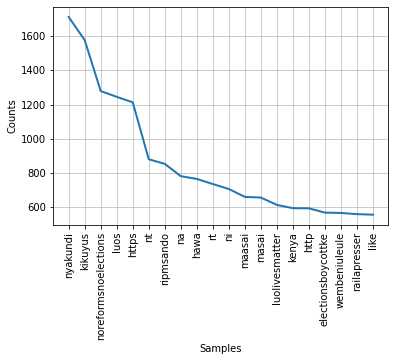

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [83]:
fdist.plot(20)

In [97]:
#Second round of stopwords removal, remove swahili conjunctions and single characters with no meaning
more_stop_words = ("rt", "nt", "https", "ni", "http")
for x in more_stop_words:
    stop_words.append(x)
# print(stop_words)
def removeSwahiliStopWords(words):
    new_words = []
    for x in words:
        if x not in stop_words:
                new_words.append(x)
    return new_words

In [98]:
nh = []
for x in ng:
    nh.append(removeSwahiliStopWords(x))    
# print(nb)

In [134]:
words = ""
for x in ni[:500]:
    for g in x:
        words = words + " " + g

fdist = FreqDist(word_tokenize(words))

In [101]:
#Delete two letted words as they do not hold much meaning
def deleteTwoWordCharacters(words):
    wd = []
    for x in words:
        if len(x) > 2:
            wd.append(x)
    return wd

In [102]:
ni = []
for x in nh:
    ni.append(deleteTwoWordCharacters(x))

In [ ]:
#Third round of stopwords removal, remove swahili conjunctions and single characters with no meaning
more_stop_words = ("rt", "nt", "https", "ni", "http")
for x in more_stop_words:
    stop_words.append(x)
# print(stop_words)
def removeSwahiliStopWords(words):
    new_words = []
    for x in words:
        if x not in stop_words:
                new_words.append(x)
    return new_words

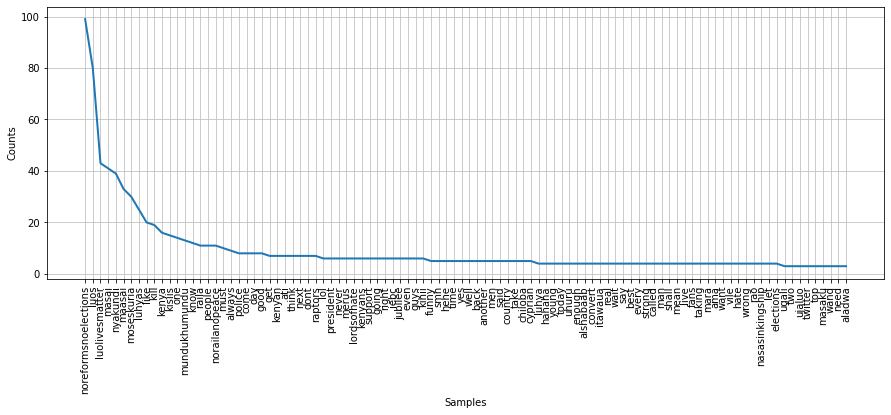

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [135]:
plt.figure(figsize=(15, 5))
fdist.plot(100)

In [127]:
#Plot a word cloud
from wordcloud import WordCloud

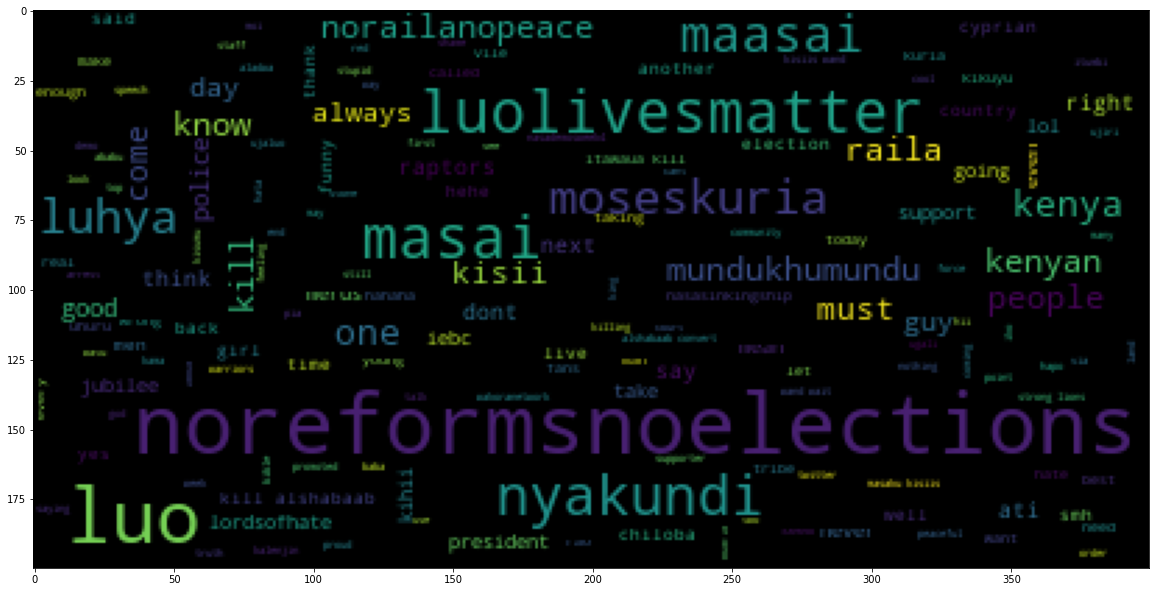

In [136]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(words))